Algorimo de KnearestNeighbors

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from collections import Counter

file_path = "dataset_phishing.csv"

df = pd.read_csv(file_path)

In [2]:
X = df[['length_url', 'nb_dots']].values  # Dos variables predictoras
y = (df['status'] == 'phishing').astype(int).values  # 1 para phishing, 0 para legitimate

In [3]:
# Normalización de las características para mejorar la convergencia
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
def euclidean_distances(X1, X2):
    dists = np.sqrt(np.sum((X1[:, np.newaxis] - X2)**2, axis=2))
    return dists

def knn_predict(X_train, y_train, X_test, k):
   
    # Calcular todas las distancias
    distances = euclidean_distances(X_test, X_train)
    
    # Obtener los índices de los k vecinos más cercanos
    k_indices = np.argsort(distances, axis=1)[:, :k]
    
    # Obtener las etiquetas de los k vecinos más cercanos
    k_nearest_labels = y_train[k_indices]
    
    # Votación mayoritaria para cada punto de prueba
    y_pred = np.array([np.bincount(labels).argmax() for labels in k_nearest_labels])
    return y_pred

In [ ]:
X_train_subset = X_train[:500]
y_train_subset = y_train[:500]

# Grid para la gráfica
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

k = 5
y_pred = knn_predict(X_train, y_train, X_test, k)

In [11]:
accuracy = np.mean(y_pred == y_test)
print(f"Exactitud del modelo K-NN con k={k}: {accuracy:.4f}")


Exactitud del modelo K-NN con k=5: 0.6339


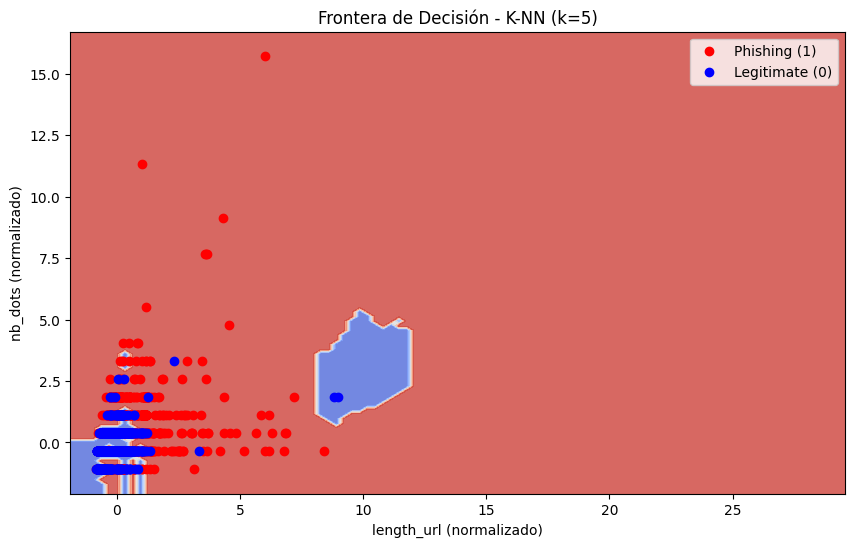

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predecir las etiquetas para los puntos del grid
Z = knn_predict(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
Z = Z.reshape(xx.shape)

# Separar los datos de prueba por clase
phishing = X_test[y_test == 1]
legitimate = X_test[y_test == 0]

# Graficar los puntos 
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(phishing[:, 0], phishing[:, 1], color='red', label='Phishing (1)')
plt.scatter(legitimate[:, 0], legitimate[:, 1], color='blue', label='Legitimate (0)')
plt.title(f'Frontera de Decisión - K-NN (k={k})')
plt.xlabel('length_url (normalizado)')
plt.ylabel('nb_dots (normalizado)')
plt.legend()
plt.show()